In [1]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math as mt
import random as r

# Leemos nuestra imagen
plt.rcParams['image.cmap'] = 'gray'
rosas1024=io.imread("imagenes/rosa1024.jpg")/255.0 #Lee la imagen y la normaliza



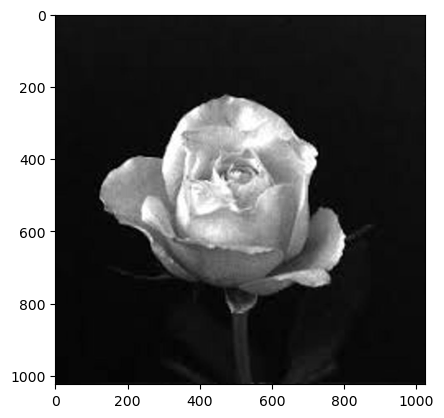

In [2]:
plt.imshow(rosas1024)

In [3]:
# Creo funcion para partir a la micha y achicar la imagen
def cut_in_half(imagen):
    imag = imagen.shape
    im_half = np.ones(((int(imag[0]/2.0)),(int(imag[1]/2.0))))
    im_half_matrix= im_half.shape
    
    for y in range(0,im_half_matrix[0]):
        for x in range(0,im_half_matrix[1]):
            im_half[y][x] = imagen[y*2][x*2]
    plt.imshow(im_half)
    return im_half




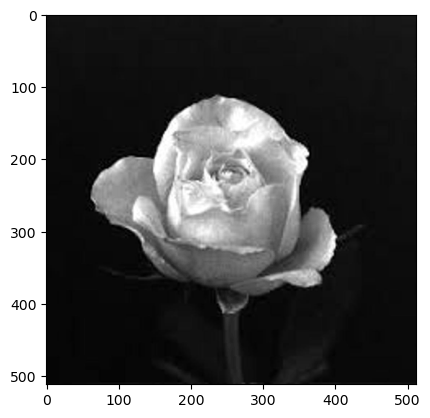

In [4]:
#Creamos la copia de 512 px
copy512 = cut_in_half(rosas1024)
plt.imshow(copy512)

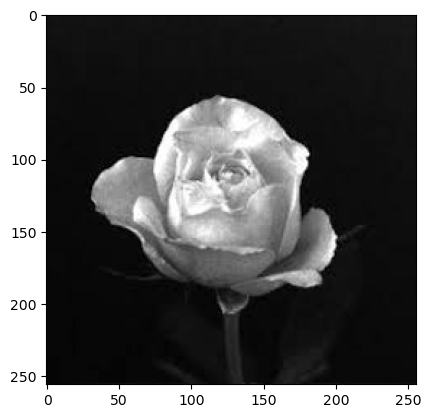

In [5]:
#Creamos la copia de 256 px
copy256 = cut_in_half(copy512)
plt.imshow(copy256)

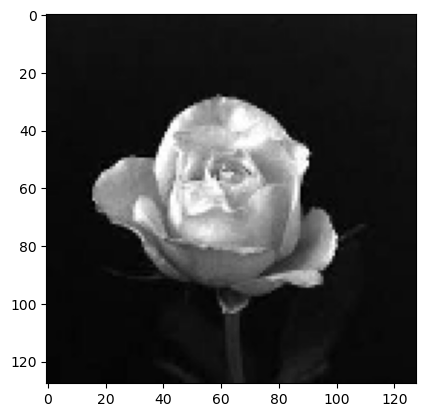

In [6]:
#Creamos la copia de 128 px
copy128 = cut_in_half(copy256)
plt.imshow(copy128)

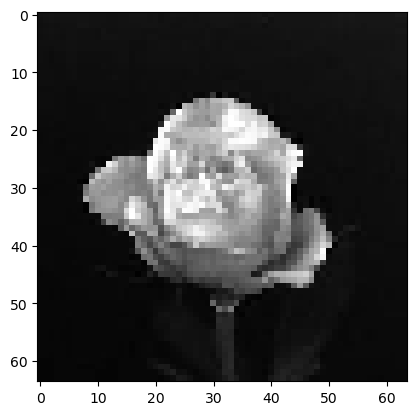

In [7]:
# Creamos la copia de 64 px
copy64 = cut_in_half(copy128)
plt.imshow(copy64)

In [8]:
#Ampliamos nuestras imagenes a 1024

def zoom(imagen):
    lienzo = np.ones(((int(imagen.shape[0])*2),(int(imagen.shape[1])*2)))
    for y in range(0,imagen.shape[0]):
        for x in range(0,imagen.shape[1]):
            lienzo[2*x][2*y]=imagen[x][y]
            lienzo[2*x+1][2*y] = imagen[x][y]
            lienzo[2*x+1][2*y+1] = imagen[x][y]
            lienzo[2*x][2*y+1]= imagen[x][y]
    return lienzo

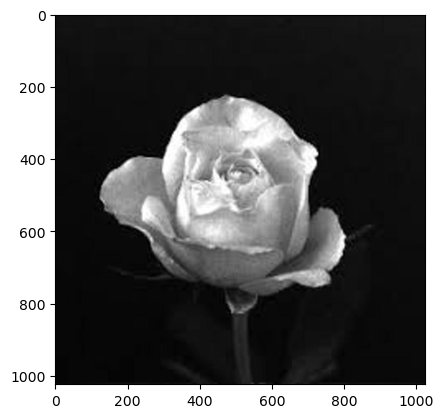

In [9]:
# Hacemos zoom de 1024px a las imagenes reducidas

# Ampliación de la imagen de 512 px
zoom512 = zoom(copy512)
plt.imshow(zoom512)

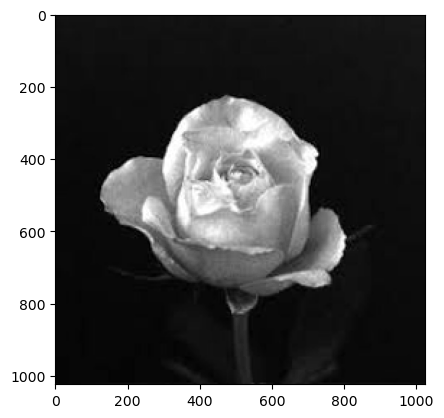

In [10]:
# Ampliación de la imagen de 256 px
zoom256= zoom(copy256)
zoom256= zoom(zoom256)
plt.imshow(zoom256)

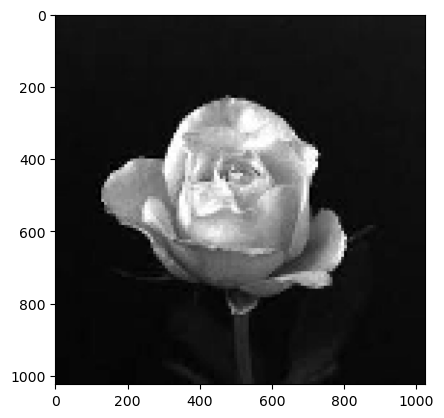

In [11]:
# Ampliación de la imagen de 128 px
zoom128= zoom(copy128)
zoom128= zoom(zoom128)
zoom128= zoom(zoom128)
plt.imshow(zoom128)

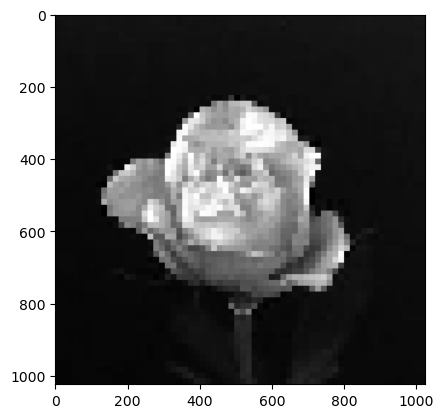

In [12]:
# Ampliación de la imagen de 64 px
zoom64= zoom(copy64)
zoom64= zoom(zoom64)
zoom64= zoom(zoom64)
zoom64= zoom(zoom64)
plt.imshow(zoom64)

In [13]:
#Leemos la imagen que vamos a cuantizar y no la normalizamos
rosas=io.imread("imagenes/rosa1024.jpg")
# Creamos una funcion para cuantizar
def cuantizar(imagen, num_de_grises):
    img_cuant = np.floor((imagen/255.0)*num_de_grises)# a cada valor [x,y] de la imagen lo dividimos entre 255 y a eso lo multiplicamos por el numero de tonos de gris, a ese resultado, le sacamos la funcion piso
    return img_cuant

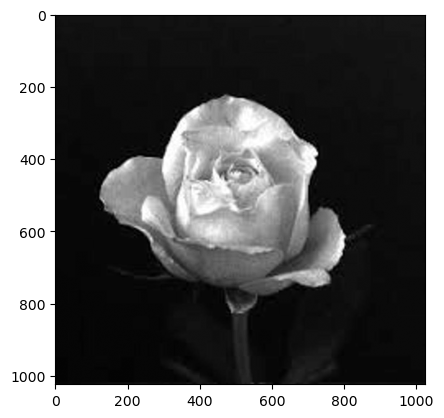

In [14]:
#Creamos las imagenes cuantizadas
#Imagen a 128 escalas de grises
r128_cuant = cuantizar(rosas,128)
plt.imshow(r128_cuant)

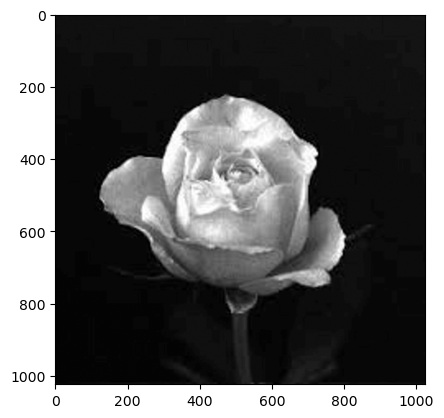

In [15]:
#Imagen a 64 escalas de grises
r64_cuant = cuantizar(rosas,64)
plt.imshow(r64_cuant)

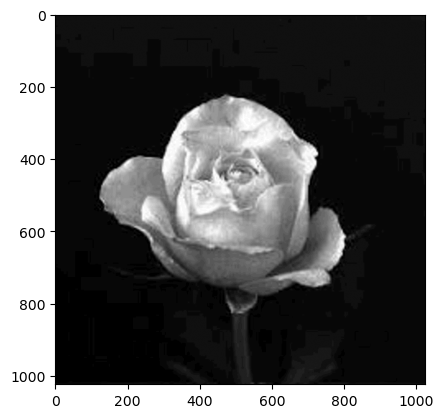

In [16]:
# Imagen a 32 escalas de gris
r32_cuant = cuantizar(rosas,32)
plt.imshow(r32_cuant)

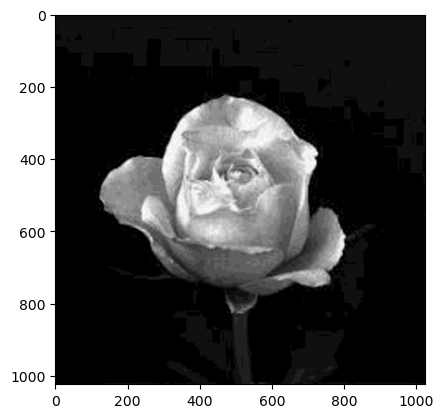

In [17]:
#Imagen a 16 escalas de gris
r16_cuant = cuantizar(rosas,16)
plt.imshow(r16_cuant)

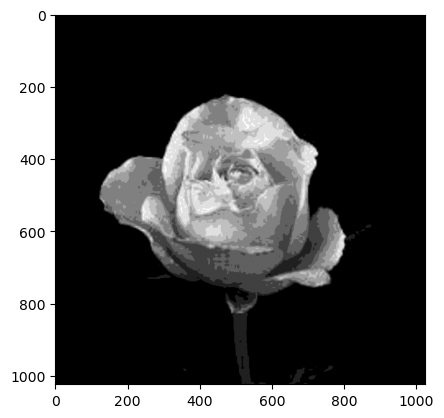

In [18]:
#IMagen a 8 escalas de gris
r8_cuant = cuantizar(rosas,8)
plt.imshow(r8_cuant)

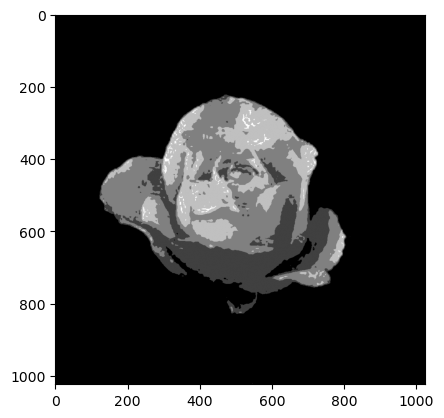

In [19]:
#Imagen a 4 escalas de gris
r4_cuant = cuantizar(rosas,4)
plt.imshow(r4_cuant)

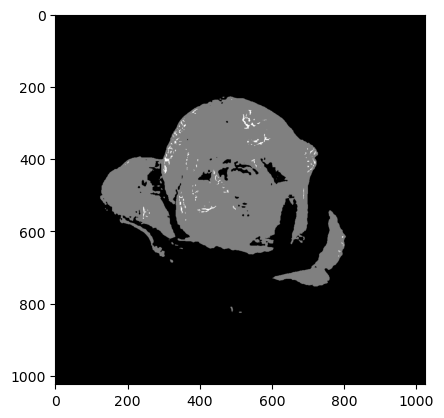

In [20]:
#Imagen a 2 escalas de gris
r2_cuant= cuantizar(rosas,2)
plt.imshow(r2_cuant)

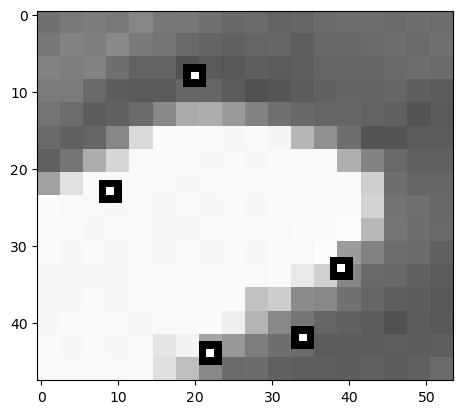

In [21]:
#Leeemos una imagen
cuadro = io.imread("imagenes/cuadro.png")
#Creamos un arreglo, aqui se guardaran los pixeles, para hacer city block y chessboard
pixeles = []
#Creamos una función para obtener los pixeles adyacentes
def obtener_pixeles_adyacentes(imagen, x, y):
    img = imagen.shape
    altura = len(imagen[0])
    ancho = len(imagen)
    pixeles_adyacentes = []
    imagen[x,y]=255.0
    
    
    
    # Verificar píxel de arriba
    if x > 0:
        
        pixeles_adyacentes.append((x - 1,y))
    
    # Verificar píxel de abajo
    if x < ancho - 1:
        
        pixeles_adyacentes.append((x + 1,y))
        
    # Verificar píxel a la izquierda
    if y > 0:
        
        pixeles_adyacentes.append((x,y - 1))
        
    # Verificar píxel a la derecha
    if y < altura - 1:
        
        pixeles_adyacentes.append((x,y + 1))
    
    #Con el random me aseguro que no toquen esquinas
    pixeles_adyacentes.append((x+1,y+1))
    pixeles_adyacentes.append((x-1,y+1))
    pixeles_adyacentes.append((x+1,y-1))
    pixeles_adyacentes.append((x-1,y-1))
    return pixeles_adyacentes


#Sacamos los pixeles aleatorios
for i in range(5):
    h = r.randint(2,46)
    w = r.randint(2,52)
    px_ady = obtener_pixeles_adyacentes(cuadro,h,w)

    #Pintamos los pixeles adyacentes
    def pintar(imagen,ady):
        for x,y in ady:
            imagen[x,y]= 1.0
    pintar(cuadro,px_ady)
    
    pixeles.append((h,w))
    
    

plt.imshow(cuadro)

In [22]:
#Hacemos city block

def city_block(arr):
    punto_fijo=arr[0]
    distancias = []
    for h,w in arr: 
        d = abs(punto_fijo[0]-h)+ abs(punto_fijo[1]-w)
        distancias.append(d)
        print("la distancia de",punto_fijo,"a ",(h,w),"es de", d)
city_block(pixeles)     


la distancia de (42, 34) a  (42, 34) es de 0
la distancia de (42, 34) a  (33, 39) es de 14
la distancia de (42, 34) a  (8, 20) es de 48
la distancia de (42, 34) a  (23, 9) es de 44
la distancia de (42, 34) a  (44, 22) es de 14


In [23]:
#Hacemos Chessboard

def chessboard(arr):
    punto_fijo=arr[0]
    distancias = []
    for h,w in arr: 
        d = max(abs(punto_fijo[0]-h), abs(punto_fijo[1]-w))
        distancias.append(d)
        print("la distancia de",punto_fijo,"a ",(h,w),"es de", d)
chessboard(pixeles)

la distancia de (42, 34) a  (42, 34) es de 0
la distancia de (42, 34) a  (33, 39) es de 9
la distancia de (42, 34) a  (8, 20) es de 34
la distancia de (42, 34) a  (23, 9) es de 25
la distancia de (42, 34) a  (44, 22) es de 12
